# Project: Finding Stroke 
## Data
According to the World Health Organisation (WHO), stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
We will use our data to predict whether a patient is likely to get a stroke based on input parameters like gender, age, various diseases and smoking status.

### Columns
- id: unique patient identifier
- gender: “Male”, “Female” or “Other”
- age: age of the patient
- hypertension: 0 (if the patient doesn’t have hypertension) or 1 (if the patient has
hypertension)
- heart_disease: 0 (if the patient doesn’t have a heart disease) or 1 (if the patient has
a heart disease)
- ever_married: “No” or “Yes”
- work_type: “children”, “Govt_job”, “Never_worked”, “Private” or “Self-employed”
- Residence_type: “Rural” or “Urban”
- avg_glucose_level: average glucose level in the blood
- bmi: body mass index
- smoking_status: “formerly smoked”, “never smoked”, “smokes” or “Unknown” (in
this case the information for the patient is not available)
- stroke: 1 (if the patient had a stroke) or 0 (if the patient didn’t have a stroke)



### Exploring the Data


In [2]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
# Load the stroke dataset
df = pd.read_csv("/content/drive/MyDrive/stroke_data.csv")

df.sample(n=5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1899,34525,Female,27.0,0,0,No,Private,Rural,83.26,22.2,never smoked,0
313,55232,Female,38.0,0,0,Yes,Private,Rural,79.83,27.9,smokes,0
1124,59940,Male,15.0,0,0,No,children,Urban,116.50,27.8,Unknown,0
3430,8264,Male,41.0,0,0,Yes,Self-employed,Rural,105.90,27.7,Unknown,0
473,11838,Female,43.0,0,0,Yes,Govt_job,Rural,70.08,26.6,never smoked,0


In [4]:
# Show Inforomation about dataset columns like( No of entries, No of columns, dtype )
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
# Show null value 
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
# Replace NaN values in bmi column with mean 
df['bmi'].fillna(value=df['bmi'].mean(), inplace=True)


In [7]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

**Now we do not have any missing values.**




In [8]:
# Drop ID column as we do not need it 

del df['id']


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [10]:
# There are 3 column contious to display its describtion
continuous_vars = ['age','avg_glucose_level','bmi']
#Show summry of  data
df[continuous_vars].describe()

,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,5110.000000
mean,43.226614,106.147677,28.893237
std,22.612647,45.283560,7.698018
min,0.080000,55.120000,10.300000
25%,25.000000,77.245000,23.800000
50%,45.000000,91.885000,28.400000
75%,61.000000,114.090000,32.800000
max,82.000000,271.740000,97.600000


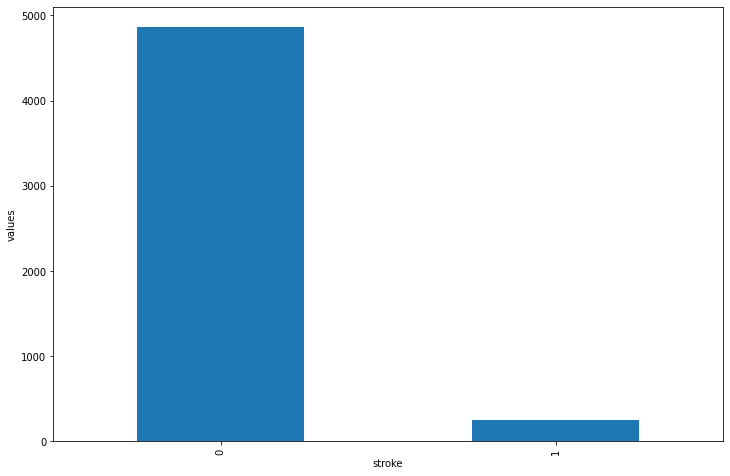

In [13]:
plt.figure(figsize=(12,8));
df['stroke'].value_counts().plot.bar() 
plt.xlabel('stroke')
plt.ylabel('values');

**Data are not balanced**

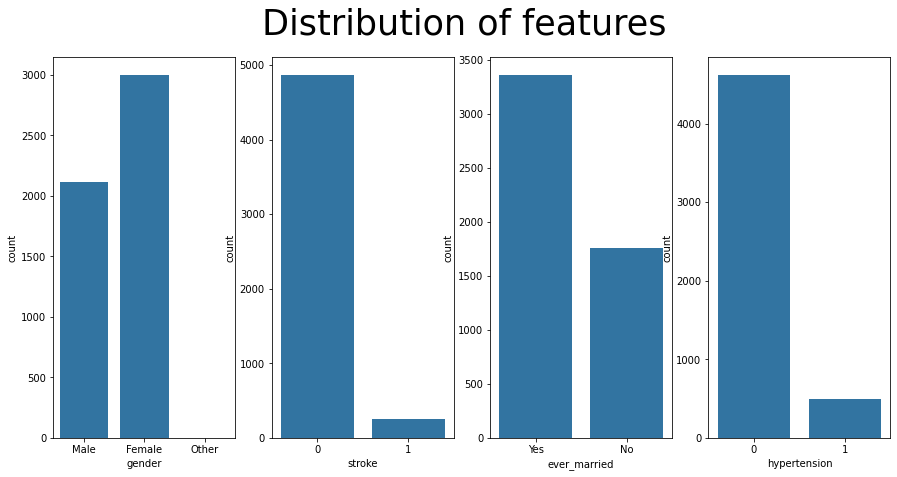

In [15]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4,figsize=(15,7))

fig.suptitle(" Distribution of features", fontsize=35)
base_color = sb.color_palette()[0]

sb.countplot(x="gender", data=df,ax=ax1, color=base_color)
sb.countplot(x="stroke", data=df,ax=ax2, color=base_color)
sb.countplot(x="ever_married", data=df,ax=ax3, color=base_color)
sb.countplot(x="hypertension", data=df,ax=ax4, color=base_color);

Our data contains
- The number of females  is greater than males
- The number of married people is greater


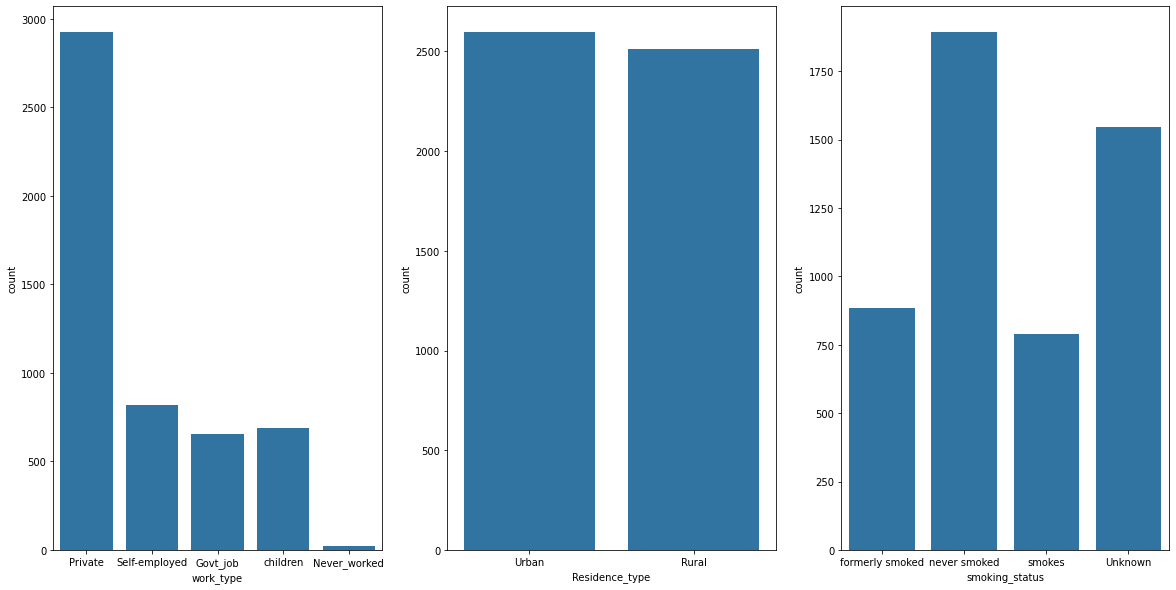

In [16]:
# Show Summary of 
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(20,10))


sb.countplot(x="work_type", data=df,ax=ax1, color=base_color)
sb.countplot(x="Residence_type", data=df,ax=ax2, color=base_color)
sb.countplot(x="smoking_status", data=df,ax=ax3, color=base_color);

Our data contains
- Those who are Private worked are more and almost no one is Never worked.
- The number of rural and urban is approximately equal.
- There are many non-smokers.


In [17]:
# Correlation Matrix to Show the relationships between the strokes and other columns
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.276398,0.263796,0.238171,0.325942,0.245257
hypertension,0.276398,1.000000,0.108306,0.174474,0.160189,0.127904
heart_disease,0.263796,0.108306,1.000000,0.161857,0.038899,0.134914
avg_glucose_level,0.238171,0.174474,0.161857,1.000000,0.168751,0.131945
bmi,0.325942,0.160189,0.038899,0.168751,1.000000,0.038947
stroke,0.245257,0.127904,0.134914,0.131945,0.038947,1.000000


<Figure size 1080x504 with 0 Axes>

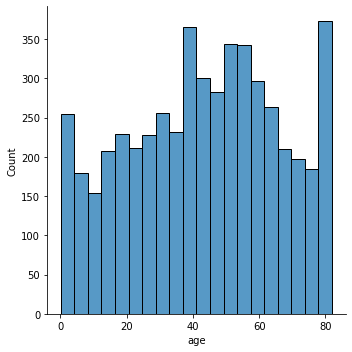

In [18]:
df['age'].nunique()
plt.figure(figsize=(15,7));
# Returns number of unique values in this attribute
sb.displot(df['age']);
# This will plot a distribution plot of variable age

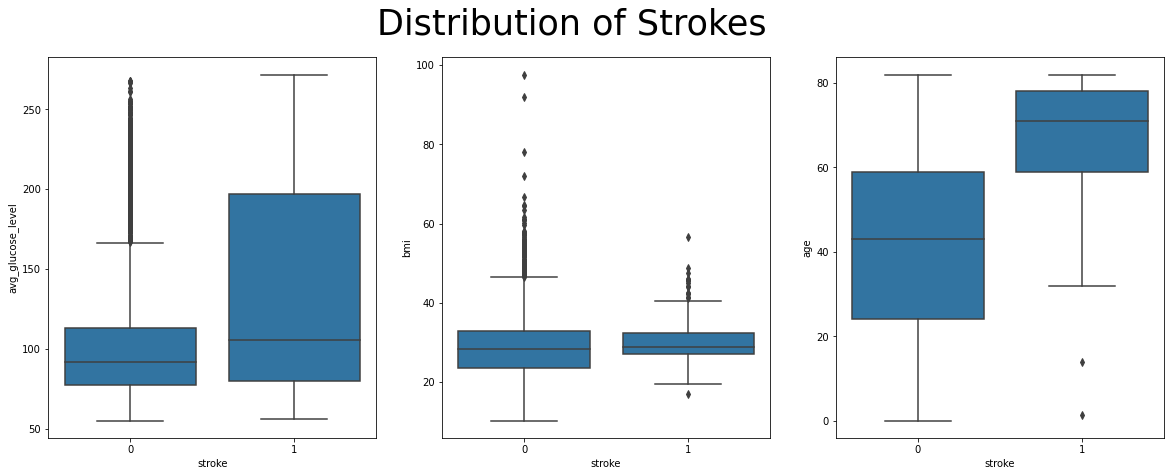

In [20]:

fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(20,7))
fig.suptitle("Distribution of Strokes   ", fontsize=35)

sb.boxplot(x="stroke", y="avg_glucose_level", data=df,ax=ax1, color=base_color)
sb.boxplot(x="stroke", y="bmi", data=df,ax=ax2, color=base_color)
sb.boxplot(x="stroke", y="age", data=df,ax=ax3, color=base_color);

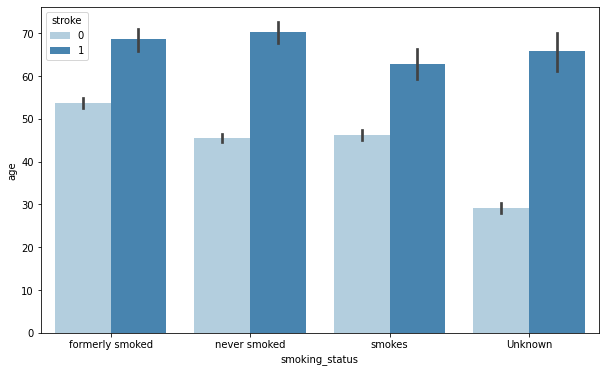

In [21]:
plt.figure(figsize = [10,6])
sb.barplot(x = 'smoking_status',y = 'age',hue = 'stroke',data = df, palette = "Blues");

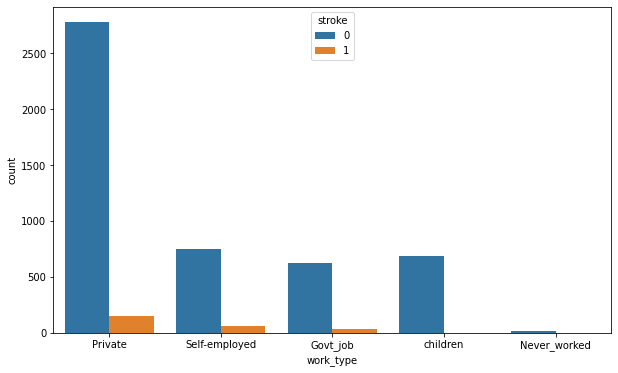

In [22]:
plt.figure(figsize = [10,6])
sb.countplot(data=df,x='work_type',hue='stroke');


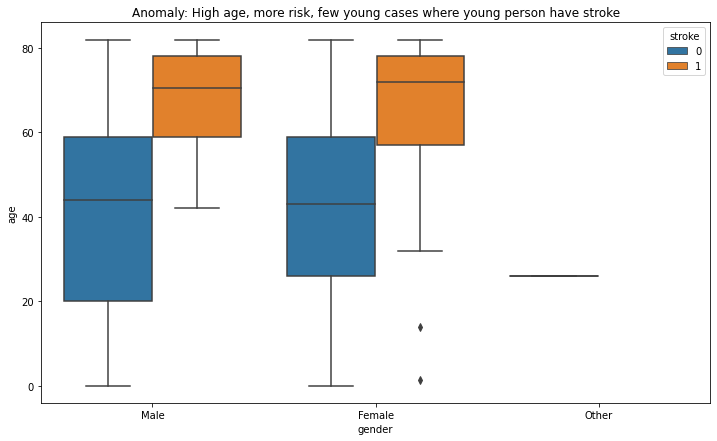

In [23]:
plt.figure(figsize = [12,7])

sb.boxplot(x="gender", y="age", hue="stroke",data=df)
plt.title("Anomaly: High age, more risk, few young cases where young person have stroke");

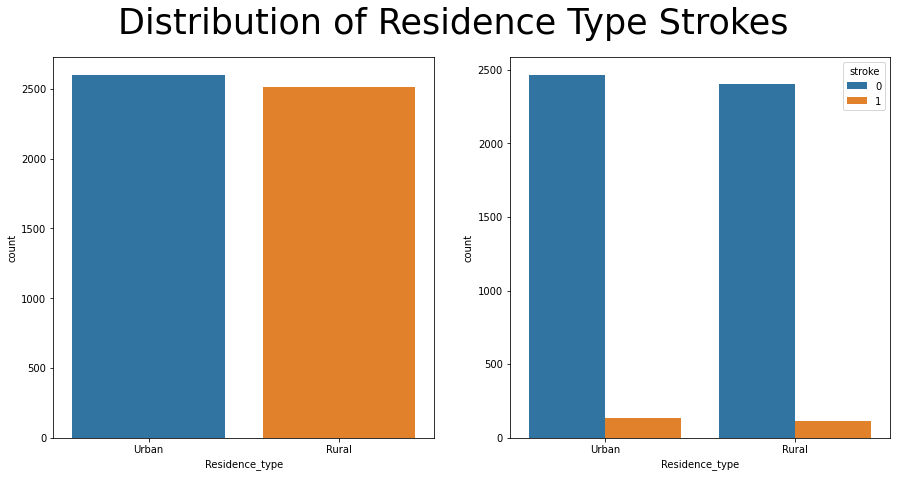

In [24]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,7))
fig.suptitle("Distribution of Residence Type Strokes ", fontsize=35)

sb.countplot(data=df,x='Residence_type',ax=ax1)
# This will create a counter plot
sb.countplot(data=df,x='Residence_type',hue='stroke',ax=ax2)
# Residence Type with respect to stroke

**It is clear that men and women between the ages of 60 and 80 are more likely to have a stroke.**

In [25]:
!pip install researchpy

In [26]:
import researchpy as rp
rp.summary_cont(df[['avg_glucose_level','age']].groupby(df['stroke']))

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


avg_glucose_level                                                  age  \
                       N      Mean       SD      SE 95% Conf.  Interval     N   
stroke                                                                          
0                   4861  104.7955  43.8461  0.6289  103.5626  106.0284  4861   
1                    249  132.5447  61.9211  3.9241  124.8160  140.2735   249   

                                                     
           Mean       SD      SE 95% Conf. Interval  
stroke                                               
0       41.9715  22.2919  0.3197   41.3447  42.5984  
1       67.7282  12.7274  0.8066   66.1396  69.3168

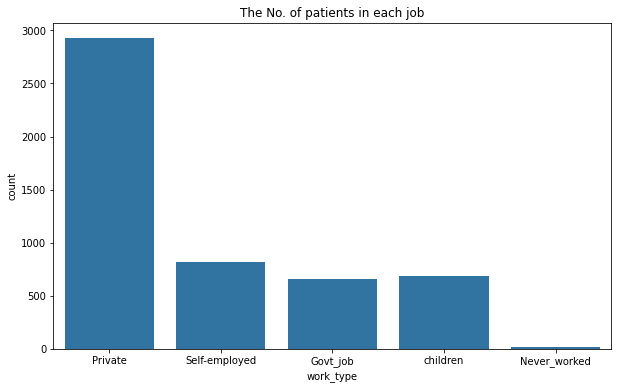

In [27]:
# Display Distribution of patients by work type
base_color = sb.color_palette()[0]
plt.figure(figsize = [10,6])
plt.title('The No. of patients in each job');
sb.countplot(data=df, x='work_type', color=base_color);

## Feature Engineering

- Label Encoding.

Our dataset is a mix of both categorical and numeric data and since ML algorithms understand data of numeric nature let’s encode our categorical data into numeric ones using Label Encoder. Label Encoder is a technique that will convert categorical data into numeric data. It takes value in ascending order and converts it into numeric data from 0 to 1.







In [28]:
# Replacing binary categorical data
df['Residence_type']= df['Residence_type'].replace({'Urban': 0})
df['Residence_type']= df['Residence_type'].replace({'Rural': 1})

df['ever_married']= df['ever_married'].replace({'Yes': 0})
df['ever_married']= df['ever_married'].replace({'No': 1})

df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,0,Private,0,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,0,Self-employed,1,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,0,Private,1,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,0,Private,0,171.23,34.400000,smokes,1
4,Female,79.0,1,0,0,Self-employed,1,174.12,24.000000,never smoked,1


In [29]:
#Replacing non-binary categorical with one-hot-encoding
df = pd.get_dummies(df,columns=['gender','work_type','smoking_status'])
df.head()

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,0,0,228.69,36.600000,1,0,1,0,0,0,1,0,0,0,1,0,0
1,61.0,0,0,0,1,202.21,28.893237,1,1,0,0,0,0,0,1,0,0,0,1,0
2,80.0,0,1,0,1,105.92,32.500000,1,0,1,0,0,0,1,0,0,0,0,1,0
3,49.0,0,0,0,0,171.23,34.400000,1,1,0,0,0,0,1,0,0,0,0,0,1
4,79.0,1,0,0,1,174.12,24.000000,1,1,0,0,0,0,0,1,0,0,0,1,0


In [30]:
#Data Scalling
from sklearn.preprocessing import StandardScaler

scaler_s = StandardScaler()

df[['age','avg_glucose_level','bmi']] = pd.DataFrame(scaler_s.fit_transform(
    df[['age','avg_glucose_level','bmi']]))
df.head()

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1.051434,0,1,0,0,2.706375,1.001234e+00,1,0,1,0,0,0,1,0,0,0,1,0,0
1,0.786070,0,0,0,1,2.121559,1.384666e-15,1,1,0,0,0,0,0,1,0,0,0,1,0
2,1.626390,0,1,0,1,-0.005028,4.685773e-01,1,0,1,0,0,0,1,0,0,0,0,1,0
3,0.255342,0,0,0,0,1.437358,7.154182e-01,1,1,0,0,0,0,1,0,0,0,0,0,1
4,1.582163,1,0,0,1,1.501184,-6.357112e-01,1,1,0,0,0,0,0,1,0,0,0,1,0


- Correlation

 Correlation Heatmap to Show the relationships between the strokes and other columns

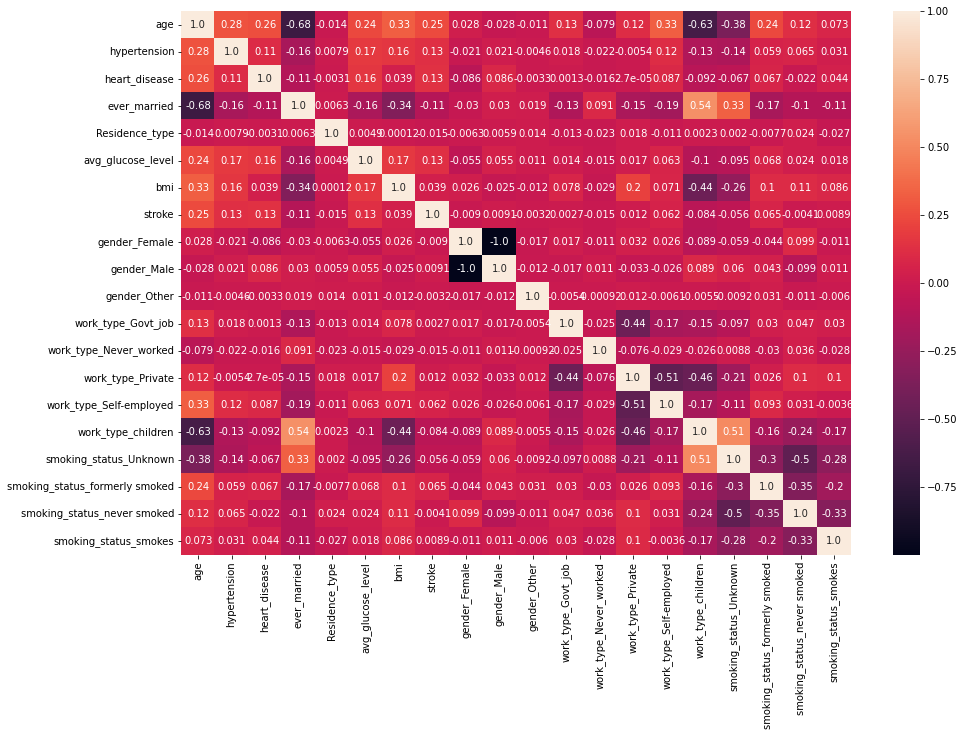

In [31]:
plt.figure(figsize=(15,10))
sb.heatmap(df.corr(),annot=True,fmt='.2');

Features that are showing some effective correlation are:
age, hypertension, heart_disease, ever_married, avg_glucose_level.

- For Feature pruning and choice justification.

We will check our features using SelectKBest and F_Classif.

In [32]:
from sklearn.feature_selection import SelectKBest, f_classif

classifier = SelectKBest(score_func=f_classif,k=5)
fits = classifier.fit(df.drop('stroke',axis=1),df['stroke'])
x=pd.DataFrame(fits.scores_)
columns = pd.DataFrame(df.drop('stroke',axis=1).columns)
f_scores = pd.concat([columns,x],axis=1)
f_scores.columns = ['Attribute','Score']
f_scores.sort_values(by='Score',ascending=False)

,Attribute,Score
0,age,326.916568
2,heart_disease,94.698406
5,avg_glucose_level,90.503870
1,hypertension,84.953542
3,ever_married,60.667230
14,work_type_children,36.184470
16,smoking_status_formerly smoked,21.376277
13,work_type_Self-employed,19.818466
15,smoking_status_Unknown,16.006799
6,bmi,7.759776


In [33]:
cols=f_scores[f_scores['Score']>50]['Attribute']
print(cols)


0                  age
1         hypertension
2        heart_disease
3         ever_married
5    avg_glucose_level
Name: Attribute, dtype: object


From the above results, We can see that age is a highly correlated variable and then it gets decreasing. I am keeping the threshold score as 50. Resulting in the same features we got in the heatmap.






## Splitting data

Now, let’s split features into training and testing sets for training and testing our classification models.

In [34]:
X = df.drop('stroke', axis=1)
y = df['stroke']

X.head()

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1.051434,0,1,0,0,2.706375,1.001234e+00,0,1,0,0,0,1,0,0,0,1,0,0
1,0.786070,0,0,0,1,2.121559,1.384666e-15,1,0,0,0,0,0,1,0,0,0,1,0
2,1.626390,0,1,0,1,-0.005028,4.685773e-01,0,1,0,0,0,1,0,0,0,0,1,0
3,0.255342,0,0,0,0,1.437358,7.154182e-01,1,0,0,0,0,1,0,0,0,0,0,1
4,1.582163,1,0,0,1,1.501184,-6.357112e-01,1,0,0,0,0,0,1,0,0,0,1,0


In [36]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
#Splitting data
x_train.shape,x_test.shape,y_train.shape,y_test.shape
# Shape of data

((3577, 19), (1533, 19), (3577,), (1533,))

- Balancing Dataset

As we know, our dataset is imbalanced. So let’s balance our data. We are going to use SMOTE method for this. It will populate our data with records similar to our minor class. Usually, we perform this on the whole dataset but as we have very fewer records of minor class I am applying it on both train and test data.



In [37]:
# To Avoid Data Leakage ,We Smote only the train set
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_resample, y_resample = smote.fit_resample(x_train, y_train.ravel())

- Before vs After Smote

In [38]:
pd.DataFrame(y_test).value_counts()


stroke
0         1446
1           87
dtype: int64

In [39]:
pd.DataFrame(y_resample).value_counts()


0    3415
1    3415
dtype: int64

**Note** 

Here I got a triple Error When I try to Balance data with Smote, I did two things to solve this error
- I did  Smote only the train set.
- Using ravel() function to Handling Imbalanced Data.

**Implementation - Creating a Training and Predicting Pipeline**

In [40]:
from sklearn.metrics import accuracy_score, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


In [41]:
def models(x, y):
    accuracy = []
    f1score = []
    model = []
    
    model.append(LogisticRegression())
    model.append(GaussianNB())
    model.append(KNeighborsClassifier())
    model.append(SVC(random_state=101))
    model.append(RandomForestClassifier(random_state=101))
    model.append(GradientBoostingClassifier(random_state=101))
    model.append(XGBClassifier(random_state=101, verbosity=0))
    
    for i in model:
        mdl = i
        i.fit(x, y)
        pred = i.predict(x_test)
        
        accuracy.append((round(accuracy_score(y_test, pred), 2))*100)
        f1score.append((round(f1_score(y_test, pred), 2))*100)
        
        print(f'Model: {i}\nAccuracy: {accuracy_score(y_test, pred)}\nF1-score: {f1_score(y_test, pred)}\n\n')

In [43]:
models(x_resample, y_resample)


Model: LogisticRegression()
Accuracy: 0.8369210697977821
F1-score: 0.2647058823529412


Model: GaussianNB()
Accuracy: 0.27788649706457924
F1-score: 0.13583138173302106


Model: KNeighborsClassifier()
Accuracy: 0.8043052837573386
F1-score: 0.16201117318435754


Model: SVC(random_state=101)
Accuracy: 0.8538812785388128
F1-score: 0.2679738562091503


Model: RandomForestClassifier(random_state=101)
Accuracy: 0.8949771689497716
F1-score: 0.16580310880829016


Model: GradientBoostingClassifier(random_state=101)
Accuracy: 0.8264840182648402
F1-score: 0.24000000000000002


Model: XGBClassifier(random_state=101, verbosity=0)
Accuracy: 0.8251793868232224
F1-score: 0.25555555555555554




### Choosing the Best Model



In [44]:
# Logistic Regression
log = LogisticRegression()
log.fit(x_resample, y_resample)
pred = log.predict(x_test)

f1 = f1_score(y_test, pred)
print('Accuracy of Logistic Regression model',accuracy_score(pred,y_test))
print(f' f1_score of {round(f1, 2)} with Logistic Regression')


Accuracy of Logistic Regression model 0.8369210697977821
 f1_score of 0.26 with Logistic Regression


In [45]:
# Random Forest Classifier

clf_rf = RandomForestClassifier()
clf_rf .fit(x_resample, y_resample)
pred = clf_rf.predict(x_test)

f1 = f1_score(y_test, pred)
print('Accuracy Random Forest Classifier model',accuracy_score(pred,y_test))
print(f'f1_score of {round(f1, 2)} with Random Forest Classifier')

Accuracy Random Forest Classifier model 0.8897586431833007
f1_score of 0.16 with Random Forest Classifier


In [46]:
# SVC Classifier

clf_svc = SVC()
clf_svc .fit(x_resample, y_resample)
pred = clf_svc.predict(x_test)

f1 = f1_score(y_test, pred)
print('Accuracy SVC Classifier ',accuracy_score(pred,y_test))
print(f'f1_score of {round(f1, 2)} with SVC')

Accuracy SVC Classifier  0.8538812785388128
f1_score of 0.27 with SVC


**The most suitable model for the task of identifying individuals a patient has a stroke or not is SVC. And because we are looking for the model that achieves the greatest accuracy in predicting the patients who may be has a stroke, we must choose the model with the most high accuracy and high F_score. But we hardly see a slight difference between the accuracy of the LogisticRegression model, and the SVC model, and also very little difference in calculating the F-score Because the SVC model worked well on this data, we conclude that it is not as large as we thought.**

**Although, the Random Forest Classifier model gives a higher accuracy than the others, but it also gives a very low F-score.**

### Model Tuning
Fine tune the chosen model. Using grid search (GridSearchCV) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this.


In [48]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.model_selection import  GridSearchCV
from sklearn.metrics import make_scorer , fbeta_score

# TODO: Initialize the classifier
clf = SVC(random_state=101)

# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
parameters = [{'C': [0.001, 0.01, 0.1, 1, 10, 100]}]

# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta= 0.5) 

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, parameters, scoring= scorer )

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(x_resample, y_resample)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(x_resample, y_resample)).predict(x_test)
best_predictions = best_clf.predict(x_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

Unoptimized model
------
Accuracy score on testing data: 0.8539
F-score on testing data: 0.2129

Optimized Model
------
Final accuracy score on the testing data: 0.8715
Final F-score on the testing data: 0.1511


The difference is   simple between the Optimized model and the Unoptimized model, and it is negligible, and it is better for the Optimized model.

